In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
#drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

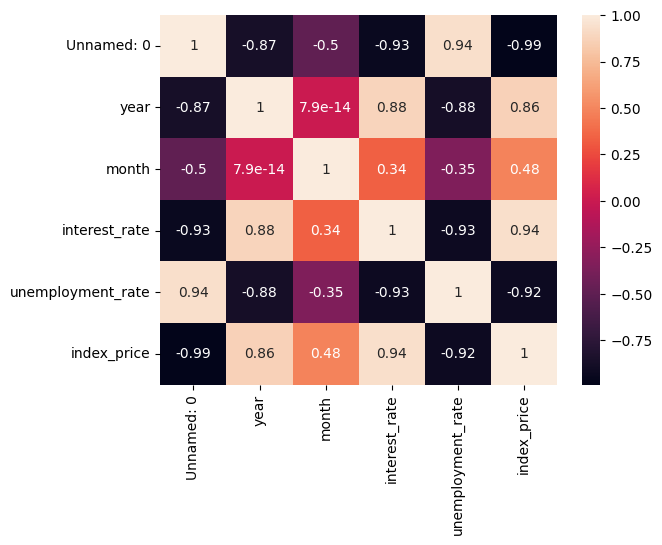

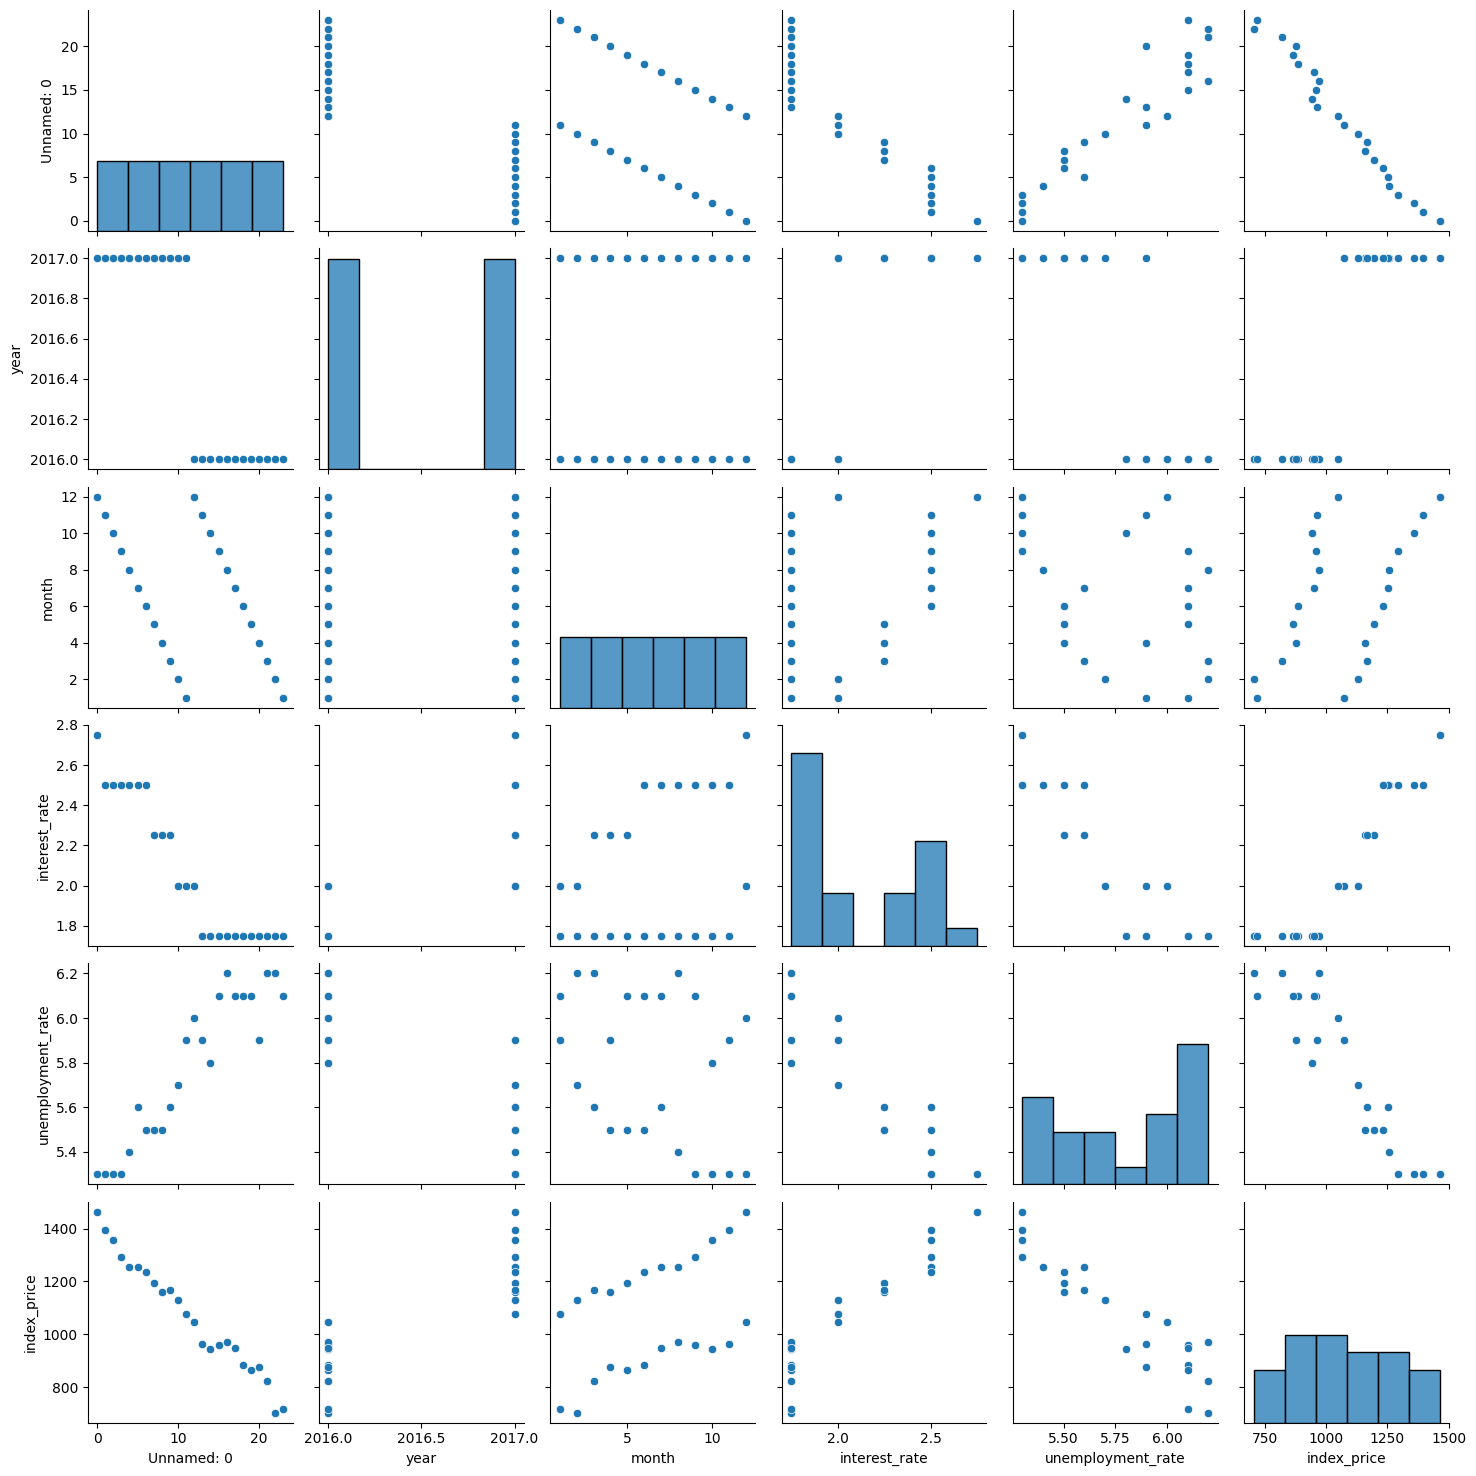

In [8]:
## Lets do some viualization
import seaborn as sns
sns.heatmap(df_index.corr(),annot=True)
sns.pairplot(df_index)

In [6]:
df_index.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

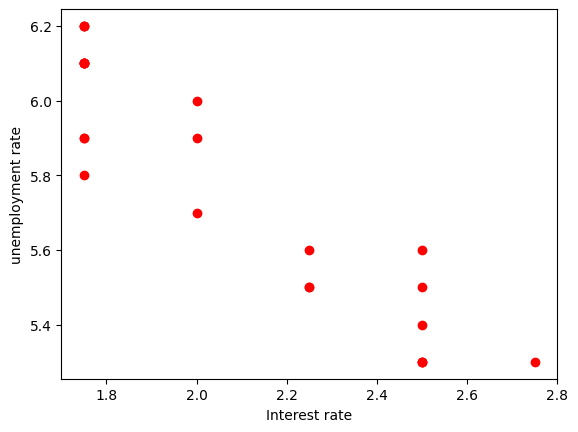

In [9]:
## Visualiza the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [10]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [11]:
X.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate
0,0,2017,12,2.75,5.3
1,1,2017,11,2.50,5.3
2,2,2017,10,2.50,5.3
3,3,2017,9,2.50,5.3
4,4,2017,8,2.50,5.4


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
import seaborn as sns



In [19]:
sns.regplot(df_index['interest_rate'],df_index['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

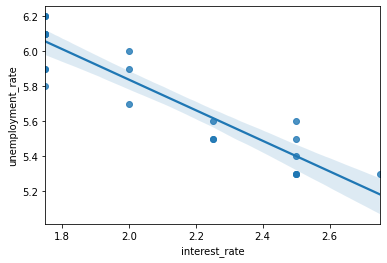

In [30]:
sns.regplot(df_index['interest_rate'],df_index['unemployment_rate'])

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='index_price', ylabel='unemployment_rate'>

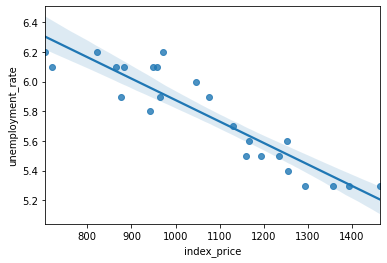

In [31]:
sns.regplot(df_index['index_price'],df_index['unemployment_rate'])

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [22]:
X_train

array([[ 0.15426662, -0.89442719,  1.25692828, -0.90115511,  0.37908503],
       [-1.51181292,  1.11803399,  1.25692828,  1.31077107, -1.48187786],
       [ 1.26498632, -0.89442719, -1.12462004, -0.90115511,  1.30956648],
       [-0.95645307,  1.11803399,  0.06615412,  1.31077107, -0.55139641],
       [-1.37297296,  1.11803399,  0.95923474,  1.31077107, -1.48187786],
       [ 0.01542666, -0.89442719,  1.55462182, -0.16384638,  0.68924552],
       [ 0.43194655, -0.89442719,  0.6615412 , -0.90115511,  0.999406  ],
       [-1.23413299,  1.11803399,  0.6615412 ,  1.31077107, -1.48187786],
       [-1.09529303,  1.11803399,  0.36384766,  1.31077107, -1.17171738],
       [ 1.40382628, -0.89442719, -1.42231358, -0.90115511,  1.30956648],
       [ 0.70962647, -0.89442719,  0.06615412, -0.90115511,  0.999406  ],
       [ 1.12614636, -0.89442719, -0.8269265 , -0.90115511,  0.37908503],
       [ 1.54266624, -0.89442719, -1.72000712, -0.90115511,  0.999406  ],
       [-0.67877315,  1.11803399, -0.5

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [24]:
regression.fit(X_train,y_train)

LinearRegression()

In [26]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [27]:
np.mean(validation_score)

-1556.4132872905557

In [28]:
## prediction
y_pred=regression.predict(X_test)

In [29]:
y_pred

array([1137.77287695,  852.80136784, 1374.71877553,  792.98757646,
       1052.52761415, 1109.85845574])

In [30]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5741.0116476034445
66.55555555559026
75.76946382021879


In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)) 
# formula for Adjusted Rsquare

0.8294647707506353
-inf


/tmp/ipykernel_448488/2415921594.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


## Assumptions

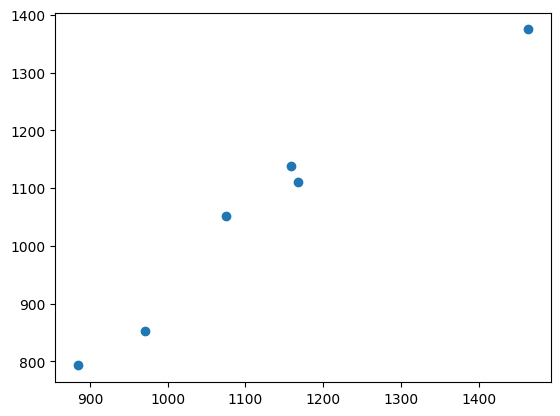

In [34]:
plt.scatter(y_test,y_pred)

In [35]:
residuals=y_test-y_pred
print(residuals)

8      21.227123
16    118.198632
0      89.281224
18     91.012424
11     22.472386
9      57.141544
Name: index_price, dtype: float64


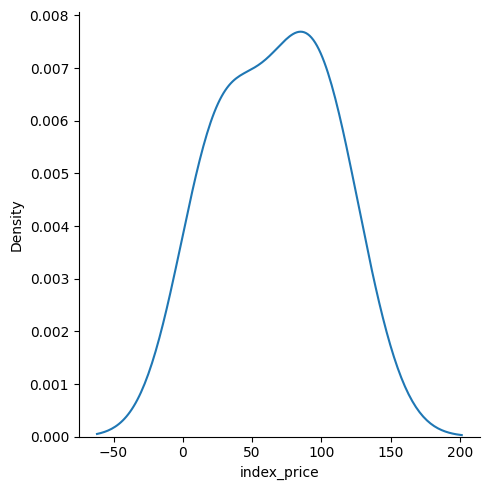

In [36]:
## Plot this residuals
sns.displot(residuals,kind='kde')

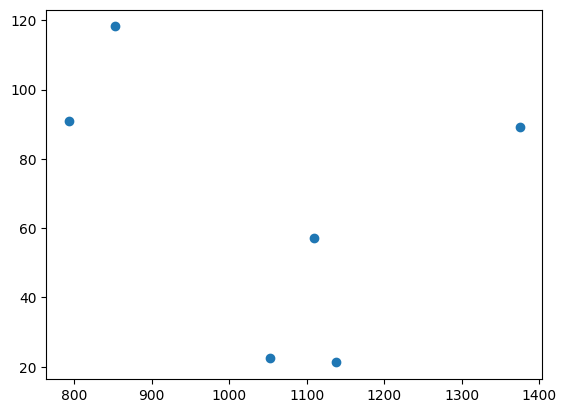

In [37]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [43]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [42]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 336.5 kB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [44]:
model.summary()

/home/rguktrkvalley/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           9.20e-11
Time:                        18:52:45   Log-Likelihood:                -87.091
No. Observations:                  18   AIC:                             184.2
Df Residuals:                      13   BIC:                             188.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6.265e+15   5.04e+13    124.318      0.000    6.16e+15    6.37e+15
x2          5.187e+15   4.17e+13    124.318      0.000     5.1e+15    5.28e+15
x3          2.922e+15   2.35e+13    124.318      0.000    2.87e+15    2.97e+15
x4             3.4387     27.874      0.123      0.904     -56.779      63.656
x5             2.8764     28.787      0.100      0.922     -59.314      65.067
==============================================================================
Omnibus:                        0.050   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.217
Skew:                          -0.102   Prob(JB):                        0.897
Kurtosis:                       2.502   Cond. No.                     1.63e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
print(regression.coef_)

[-99.315132    95.15576872  44.03529318   3.91839437   4.31560867]
